In [2]:
from pathlib import Path

import plotnine as pn
import scanpy as sc
import partipy as pt

import pandas as pd
import decoupler as dc


figure_dir = Path("figures") / "fibroblast_cross_condition"
figure_dir.mkdir(exist_ok=True, parents=True)
sc.settings.figdir = figure_dir

output_dir = Path("output") / "fibroblast_cross_condition"
output_dir.mkdir(exist_ok=True, parents=True)

n_archetypes = 3
obsm_key = "X_pca_harmony"
obsm_dim = 16

color_dict = {
    "NF": "#01665E",  # teal (blue-green)
    "CM": "#8C510A",  # brown
}

adata = pt.read_h5ad("/home/pschaefer/fibroblast_cross_condition_partipy.h5ad")

msigdb_cache_path = output_dir / "msigdb_raw.pkl"
needs_cache_write = False
if msigdb_cache_path.exists():
    msigdb_raw = pd.read_pickle(msigdb_cache_path)
else:
    msigdb_raw = dc.op.resource("MSigDB")
    needs_cache_write = True

if msigdb_raw.duplicated(["geneset", "genesymbol"]).any():
    msigdb_raw = msigdb_raw[~msigdb_raw.duplicated(["geneset", "genesymbol"])].copy()
    needs_cache_write = True

if needs_cache_write:
    msigdb_raw.to_pickle(msigdb_cache_path)

In [93]:
p = (
    pt.plot_archetypes_2D(
        adata=adata,
        dimensions=[0, 1],
        show_contours=True,
        color="disease",
        alpha=0.0,
        size=0.5,
        result_filters={"n_archetypes": n_archetypes},
    )
    # draw points again with alpha mapped by disease
    + pn.geom_point(
        data=plot_df,
        mapping=pn.aes(x="pc_0", y="pc_1", alpha="disease", color="disease"),
        size=0.5,
    )
    + pn.scale_color_manual(values=color_dict)
    + pn.scale_alpha_manual(values={"NF": 0.0, "CM": 0.05}, breaks=[])
    + pn.guides(color=pn.guide_legend(override_aes={"alpha": 1.0, "size": 5}))
    + pn.theme_bw()
    + pn.labs(x="PC 0", y="PC 1", color="Disease\nStatus")
    + pn.coord_equal()
    + pn.theme(
        legend_key=pn.element_rect(fill="white", color="white"),
        legend_background=pn.element_rect(fill="white", color="black"),
        axis_title_x=pn.element_text(size=16),
        axis_title_y=pn.element_text(size=16),
        axis_text=pn.element_text(size=13),
    )
)
p.save(figure_dir / "plot_archetypes_2D_disease_pc1_pc_2_only_CM.png", verbose=False, dpi=300)

p = (
    pt.plot_archetypes_2D(
        adata=adata,
        dimensions=[0, 1],
        show_contours=True,
        color="disease",
        alpha=0.0,
        size=0.5,
        result_filters={"n_archetypes": n_archetypes},
    )
    # draw points again with alpha mapped by disease
    + pn.geom_point(
        data=plot_df,
        mapping=pn.aes(x="pc_0", y="pc_1", alpha="disease", color="disease"),
        size=0.5,
    )
    + pn.scale_color_manual(values=color_dict)
    + pn.scale_alpha_manual(values={"NF": 0.05, "CM": 0.0}, breaks=[])
    + pn.guides(color=pn.guide_legend(override_aes={"alpha": 1.0, "size": 5}))
    + pn.theme_bw()
    + pn.labs(x="PC 0", y="PC 1", color="Disease\nStatus")
    + pn.coord_equal()
    + pn.theme(
        legend_key=pn.element_rect(fill="white", color="white"),
        legend_background=pn.element_rect(fill="white", color="black"),
        axis_title_x=pn.element_text(size=16),
        axis_title_y=pn.element_text(size=16),
        axis_text=pn.element_text(size=13),
    )
)
p.save(figure_dir / "plot_archetypes_2D_disease_pc1_pc_2_only_HF.png", verbose=False, dpi=300)

/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='optim_kwargs', input_value=(), input_type=tuple])
/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='optim_kwargs', input_value=(), input_type=tuple])


/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='optim_kwargs', input_value=(), input_type=tuple])


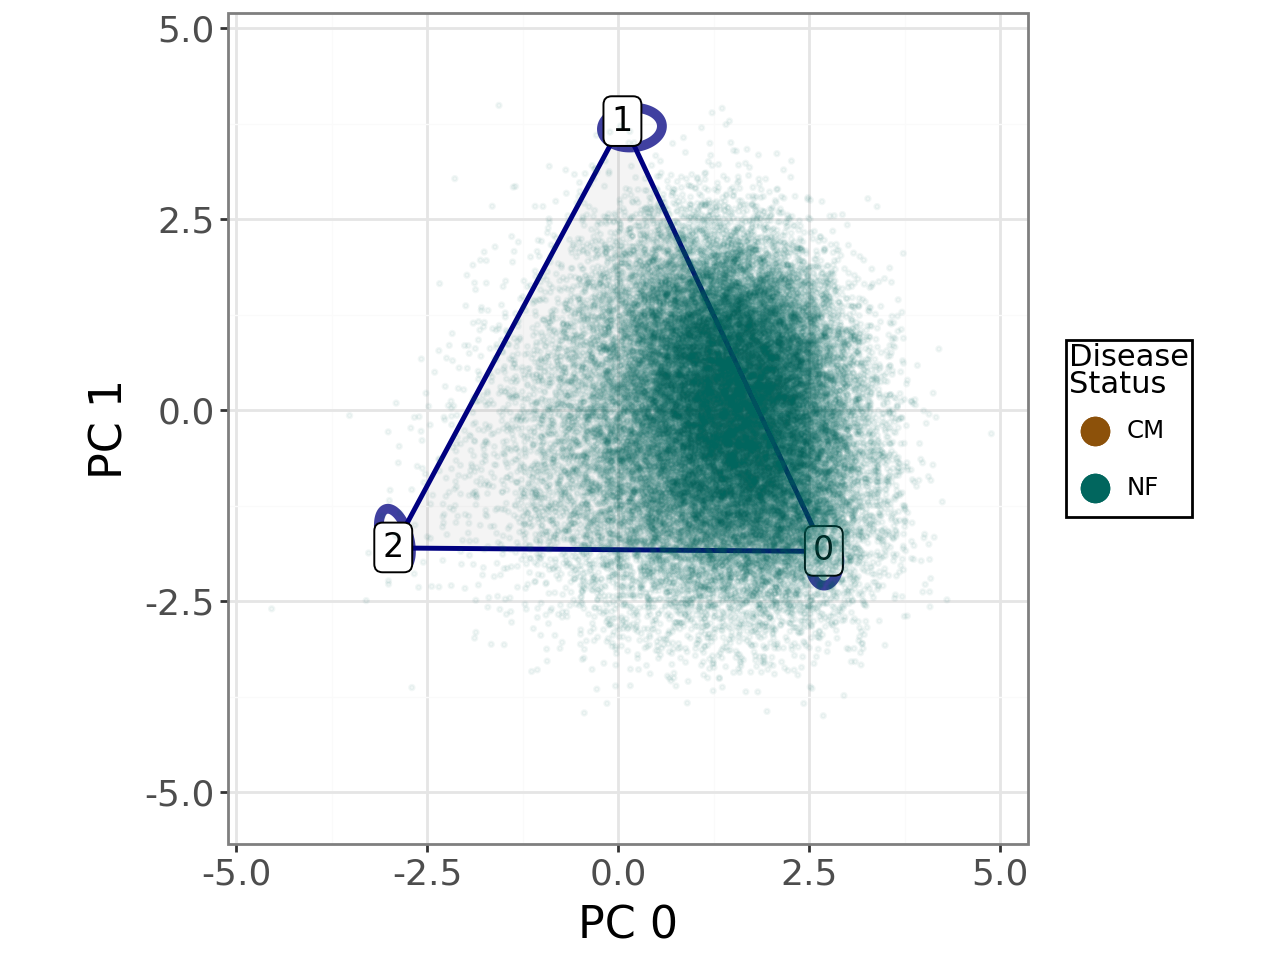

In [ ]:
import plotnine as pn

# Make a plotting data frame with the coordinates used for plotting
# (adjust if your pt.plot_archetypes_2D uses different columns)
plot_df = adata.obs.copy()
plot_df["pc_0"] = adata.obsm["X_pca_harmony"][:, 0]
plot_df["pc_1"] = adata.obsm["X_pca_harmony"][:, 1]

color_dict = {"NF": "#01665E", "CM": "#8C510A"}
alpha_dict = {"NF": 0.05, "CM": 0.0}

p = (
    pt.plot_archetypes_2D(
        adata=adata,
        dimensions=[0, 1],
        show_contours=True,
        color="disease",
        # IMPORTANT: don't fix alpha here if you want per-condition alpha
        alpha=0.0,
        size=0.5,
        result_filters={"n_archetypes": n_archetypes},
    )
    # draw points again with alpha mapped by disease
    + pn.geom_point(
        data=plot_df,
        mapping=pn.aes(x="pc_0", y="pc_1", alpha="disease", color="disease"),
        size=0.5,
    )
    + pn.scale_color_manual(values=color_dict)
    + pn.scale_alpha_manual(values=alpha_dict, breaks=[])
    + pn.guides(color=pn.guide_legend(override_aes={"alpha": 1.0, "size": 5}))
    + pn.theme_bw()
    + pn.labs(x="PC 0", y="PC 1", color="Disease\nStatus")
    + pn.coord_equal()
    + pn.theme(
        legend_key=pn.element_rect(fill="white", color="white"),
        legend_background=pn.element_rect(fill="white", color="black"),
        axis_title_x=pn.element_text(size=16),
        axis_title_y=pn.element_text(size=16),
        axis_text=pn.element_text(size=13),
    )
)
p.show()

In [35]:
import numpy as np

pt.compute_archetype_weights(
    adata=adata, mode="automatic", result_filters={"n_archetypes": n_archetypes}
)
# NOTE: here we make sure that the weights per archetype sums to one
weights = pt.get_aa_cell_weights(adata, n_archetypes=n_archetypes)
weights /= weights.sum(axis=0, keepdims=True)
assert np.allclose(weights.sum(axis=0), 1, rtol=1e-3)

Applied length scale is 1.91.


In [39]:
# add weigths to adata.obs for plotting
for arch_idx in range(n_archetypes):
    adata.obs[f"weigths_for_arch_{arch_idx}"] = weights[:, arch_idx].copy()

In [ ]:
for arch_idx in range(n_archetypes):
    p = (
        pt.plot_archetypes_2D(
            adata=adata,
            dimensions=[0, 1],
            show_contours=True,
            color=f"weigths_for_arch_{arch_idx}",
            alpha=0.05,
            size=0.5,
            result_filters={"n_archetypes": n_archetypes},
        )
        + pn.theme_bw()
        + pn.guides(color=pn.guide_legend(override_aes={"alpha": 1.0, "size": 5}))
        + pn.labs(x="PC 0", y="PC 1")
        + pn.coord_equal()
        + pn.theme(
            legend_key=pn.element_rect(fill="white", color="white"),
            legend_background=pn.element_rect(fill="white", color="black"),
            axis_title_x=pn.element_text(size=16),
            axis_title_y=pn.element_text(size=16),
            axis_text=pn.element_text(size=13),
        )
    )
    p.save(
        figure_dir / f"plot_archetypes_2D_weigths_{arch_idx}_pc0_pc_1.png",
        verbose=False,
    )

/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='optim_kwargs', input_value=(), input_type=tuple])
/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='optim_kwargs', input_value=(), input_type=tuple])
/home/pschaefer/miniforge3/envs/partipy/lib/python3.11/site-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='optim_kwargs', input_value=(), input_type=tuple])


In [ ]:
adata.obs.value_counts("disease").reset_index().rename(
    columns={"count": "total_disease_count"}
).set_index("disease")

,total_disease_count
disease,
CM,109000
NF,38219


In [89]:
n_closest_cells = len(adata.obs) // 10
print(n_closest_cells)

df = (
    adata.obs.sort_values("weigths_for_arch_2", ascending=False)
    .head(n_closest_cells)
    .value_counts(["disease", "donor_id"])
    .reset_index()
    .join(
        adata.obs.value_counts("disease")
        .reset_index()
        .rename(columns={"count": "total_disease_count"})
        .set_index("disease"),
        on="disease",
    )
)
df["count_normalized"] = df["count"] / df["total_disease_count"]# * n_closest_cells
df = df.sort_values("count_normalized", ascending=False)
df["log10_count"] = np.log10(df["count"])
df["rank"] = 1 + (-1 * df["count_normalized"].to_numpy()).argsort().argsort()
df

14721


,disease,donor_id,count,total_disease_count,count_normalized,log10_count,rank
0,CM,P1304,2934,109000,0.026917,3.467460,1
1,CM,P1425,1688,109000,0.015486,3.227372,2
2,CM,P1479,927,109000,0.008505,2.967080,3
3,CM,P1437,876,109000,0.008037,2.942504,4
4,CM,P1630,774,109000,0.007101,2.888741,5
5,CM,P1722,732,109000,0.006716,2.864511,6
6,CM,P1447,624,109000,0.005725,2.795185,7
7,CM,P1735,514,109000,0.004716,2.710963,8
8,CM,P1472,500,109000,0.004587,2.698970,9
23,NF,P1718,161,38219,0.004213,2.206826,10


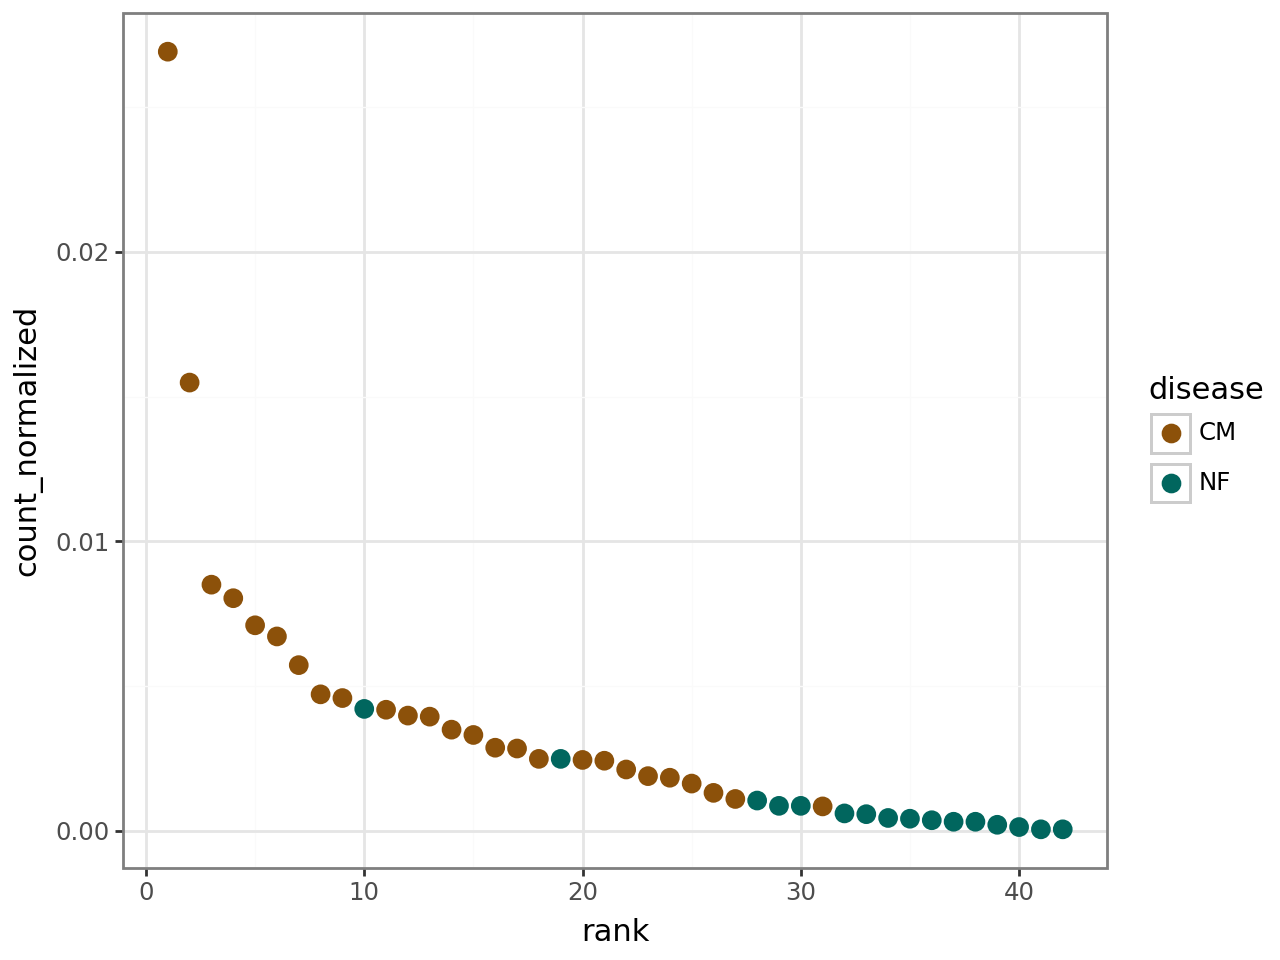

In [90]:
p = (
    pn.ggplot(df)
    + pn.geom_point(pn.aes(x="rank", y="count_normalized", color="disease"), size=3)
    + pn.scale_color_manual(values=color_dict)
    + pn.theme_bw()
)
p.show()

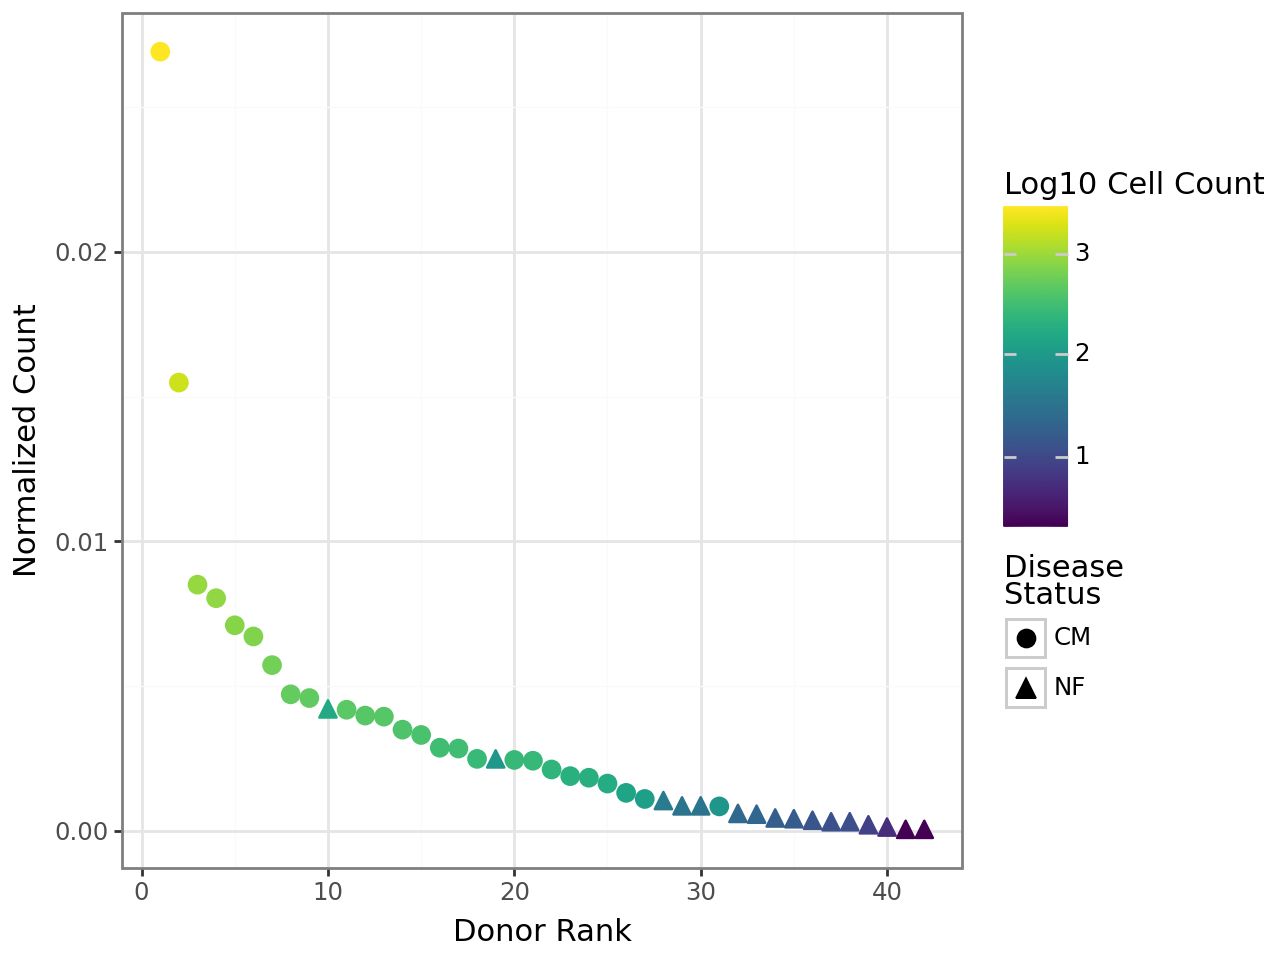

In [91]:
p = (
    pn.ggplot(df)
    + pn.geom_point(
        pn.aes(x="rank", y="count_normalized", color="log10_count", shape="disease"),
        size=3,
    )
    + pn.theme_bw()
    + pn.labs(x="Donor Rank", y="Normalized Count", shape="Disease\nStatus", color="Log10 Cell Count")
)
p.show()

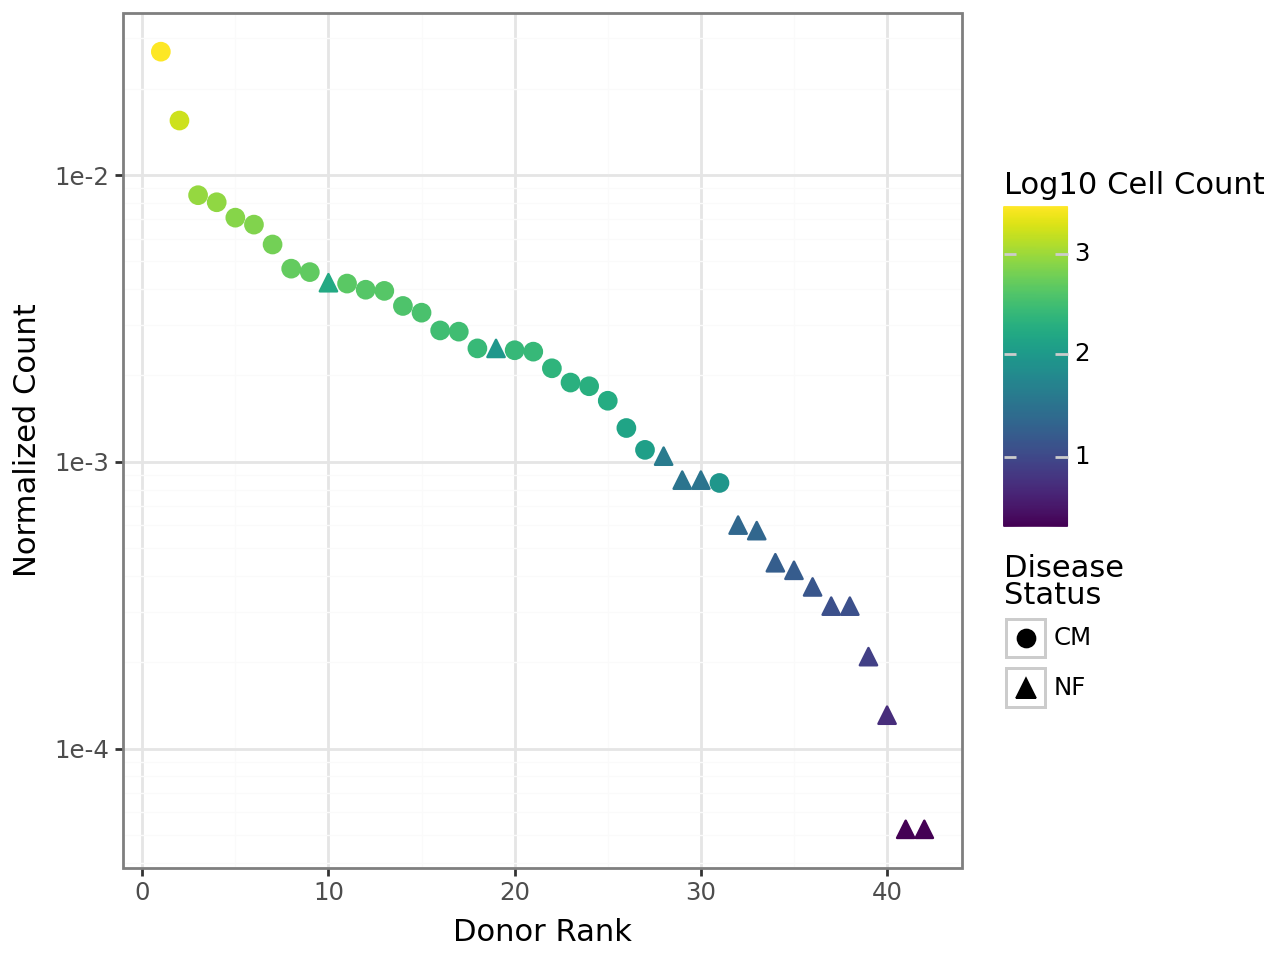

In [92]:
p = (
    pn.ggplot(df)
    + pn.geom_point(
        pn.aes(x="rank", y="count_normalized", color="log10_count", shape="disease"),
        size=3,
    )
    + pn.theme_bw()
    + pn.labs(x="Donor Rank", y="Normalized Count", shape="Disease\nStatus", color="Log10 Cell Count")
    + pn.scale_y_log10()
)
p.show()

In [ ]:
adata.obs.sort_values("weigths_for_arch_2", ascending=False).head(10_000).value_counts(
    "donor_id"
)

donor_id
P1304    2236
P1425    1222
P1479     628
P1437     548
P1722     511
P1630     498
P1447     421
P1735     335
P1472     324
P1358     298
P1617     290
P1631     286
P1707     245
P1422     216
P1462     203
P1430     200
P1504     176
P1606     174
P1300     164
P1510     156
P1508     138
P1371     126
P1685     111
P1718     100
P1602      96
P1726      76
P1290      57
P1516      52
P1622      18
P1610      18
P1547      15
P1515      13
P1561      11
P1539       8
P1558       7
P1603       6
P1540       6
P1549       5
P1582       3
P1600       2
P1702       1
P1678       0
Name: count, dtype: int64